## Importing Necessary Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

## Exploratory Data Anlaysis

In [3]:
#  Reading customer data
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")
customer_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [4]:
#  Reading transaction data
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")
transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [5]:
#  Checking the shapes of both dataset
print("The shape of Purchase Behaviour dataset is:",customer_data.shape)
print("The shape of Transaction data dataset is:",transaction_data.shape)

The shape of Purchase Behaviour dataset is: (72637, 3)
The shape of Transaction data dataset is: (264836, 8)


In [6]:
#  determine the datatypes of transaction data
print("The datatype of transaction data is:\n",transaction_data.dtypes)

The datatype of transaction data is:
 DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [7]:
#  Check for null values
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
#  Convert the int dtype of DATE column to datetime datatype
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [11]:
#  Again Check the datatypes of the transaction_data
transaction_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [12]:
#  summary of transaction_data to examine the PROD_NAME
summary = transaction_data['PROD_NAME'].unique()
print(summary)

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [13]:
#  Split product name into words and explode into separate rows
split_words = transaction_data['PROD_NAME'].str.split().explode()

#  clean the words by removing the non-alphabetic character and digits
cleaned_words = split_words.str.replace(r'\d+|[^a-zA-Z]','',regex = True)

#  Remove the null values
non_null_words = cleaned_words[cleaned_words != '']

#  Count the frequency of each words
word_frequency = non_null_words.value_counts()
print(word_frequency)

PROD_NAME
g          246628
Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
            ...  
Whlegrn      1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Name: count, Length: 196, dtype: int64


In [14]:
#  Remove any salsa products
contains_salsa = transaction_data['PROD_NAME'].str.contains('salsa', case=False)

#  Keep only rows rows where salsa is not found
transaction_data = transaction_data[~contains_salsa]

In [15]:
print(transaction_data.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      

In [16]:
#  Finding the outlier transactions for 200 packets of chip bought
outlier_data = transaction_data[transaction_data['PROD_QTY'] == 200]
print("Outlier Transaction: \n",outlier_data)

#  find the first loyalty card number from outlier_data
loyalty_card_number = outlier_data['LYLTY_CARD_NBR'].iloc[0]

#  filtering the transaction_data to find the rows with same loyalty card number
customer_transaction = transaction_data[transaction_data['LYLTY_CARD_NBR'] == loyalty_card_number]

#  print the filtered transactions
print("\n\nCustomer Transaction Data: \n",customer_transaction)

Outlier Transaction: 
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


Customer Transaction Data: 
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [17]:
#  FIltering the customer based on the loyalty card number
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != outlier_data['LYLTY_CARD_NBR'].iloc[0]]

#  re-examine transaction_data
print(transaction_data.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467400e+05  246740.000000  246740.000000  246740.000000  
mean   1.351304e+05      56.352213       1.906456       7.316113  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756875e+04      26.000000       2.000000       5.800000  
50%    1.351815e+05      

In [18]:
#  counting the number of transactions by date
transaction_by_day = transaction_data.groupby('DATE').size().reset_index(name='No. of Transactions')
transaction_by_day

,DATE,No. of Transactions
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [19]:
#  creating a sequence of date and join this on the count of transaction by date
date_sequence = pd.date_range(start='2018-07-01', end='2019-06-30')
transaction_by_day = pd.DataFrame(date_sequence, columns=['DATE']).merge(transaction_by_day, on='DATE', how='left').fillna(0)
transaction_by_day

,DATE,No. of Transactions
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


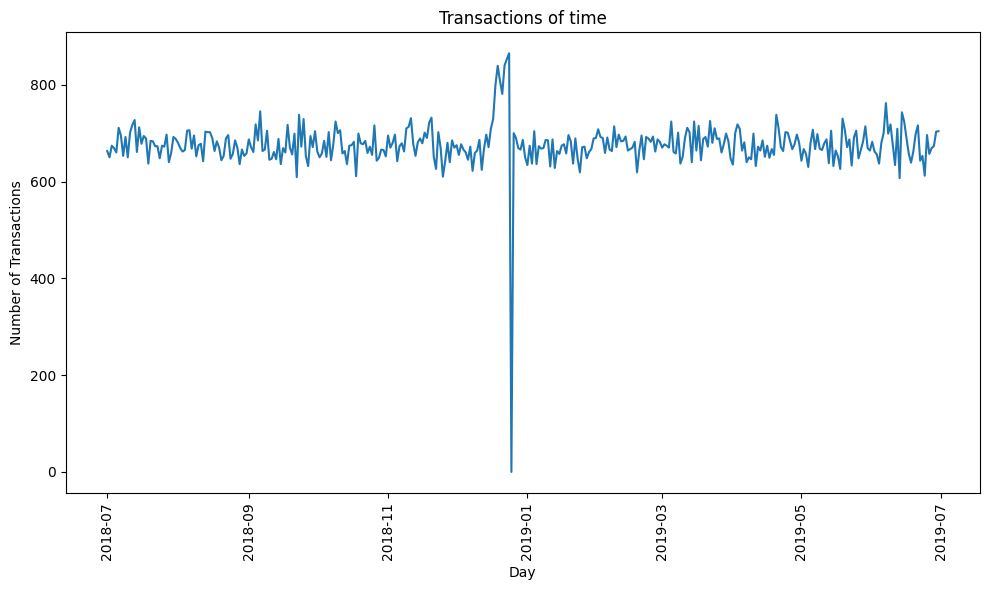

In [20]:
#  Plot transactions over time
plt.figure(figsize=(10,6))
sns.lineplot(data = transaction_by_day, x='DATE', y='No. of Transactions')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.title('Transactions of time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("TransactionsTime.png")
plt.show()

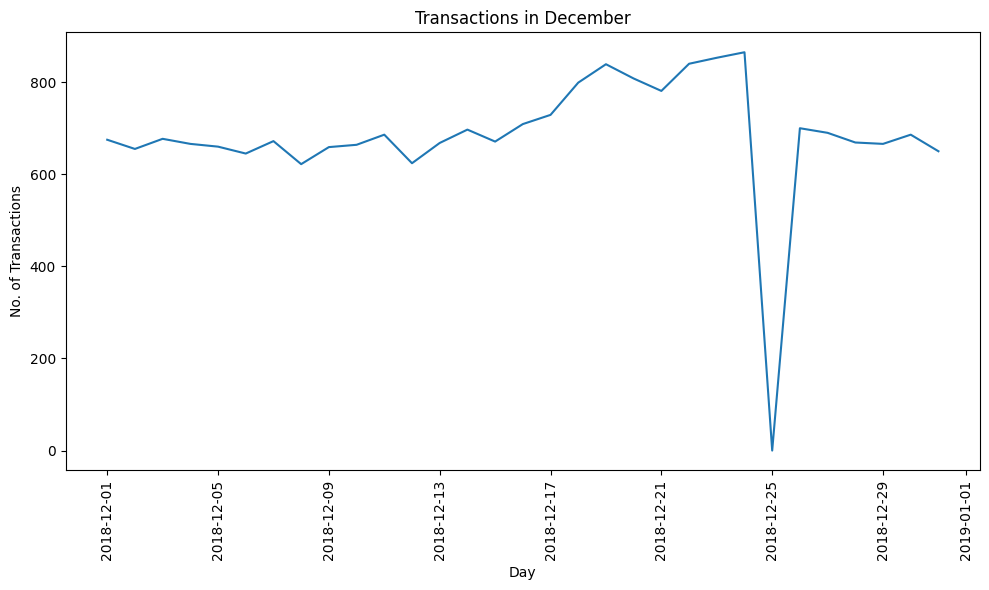

In [21]:
#  Zooming in on transactions on december
december_transaction = transaction_by_day[(transaction_by_day['DATE'].dt.month == 12)]
plt.figure(figsize=(10,6))
sns.lineplot(data = december_transaction, x='DATE', y='No. of Transactions')
plt.xlabel('Day')
plt.ylabel('No. of Transactions')
plt.title('Transactions in December')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
#  Extracting the data from PROD_NAME for packsize
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype('int')

#  Check if the pack size look sensible
packsizesummary = transaction_data['PACK_SIZE'].value_counts().sort_index()
print(packsizesummary)

PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    40203
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
330    12540
380     6416
Name: count, dtype: int64


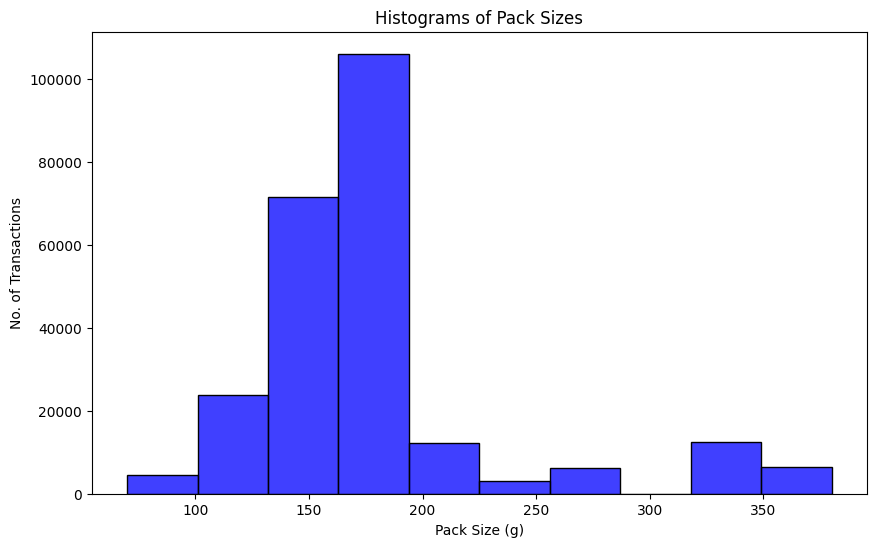

In [23]:
#  Plot a histogram of PACK_SIZE
plt.figure(figsize=(10,6))
sns.histplot(transaction_data['PACK_SIZE'], bins=10, kde=False, color='blue')
plt.xlabel('Pack Size (g)')
plt.ylabel('No. of Transactions')
plt.title('Histograms of Pack Sizes')
plt.show()

In [24]:
#  Creating the brand name
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split('\\s+').str[0]

#  Clean brands names
transaction_data['BRAND'] = transaction_data['BRAND'].replace({'RED': 'RRD', 'Kettle': 'KET', 'Smith': 'SMITH', 'Grain': 'GRAIN', 'Doritos': 'DORITOS'})

#  check the results look resonables
brandsummary = transaction_data['BRAND'].value_counts()
print(brandsummary)

BRAND
KET           41288
Smiths        27390
Pringles      25102
DORITOS       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
GRAIN          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
SMITH          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64


In [25]:
#  Examine customer data
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [26]:
print(customer_data.dtypes)

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [29]:
# Check for nulls
print(customer_data.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [30]:
##  Merger transaction data to customer data
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

# check fo the rows of data is same as in transaction_data
print(len(data) == len(transaction_data))

True


In [31]:
# Check if some customers were not matched on by checking for nulls
missing_customers = data[data['LIFESTAGE'].isnull() | data['PREMIUM_CUSTOMER'].isnull()]
print(missing_customers)

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [32]:
# data.to_csv('Complete_Data.csv',index=False)

## Data Analysis on Customer Segments

In [33]:
#  Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales = (
    data
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(total_sales=('TOT_SALES', 'sum'))  # Sum of total sales
    .reset_index()
)

print(total_sales)

                 LIFESTAGE PREMIUM_CUSTOMER  total_sales
0   MIDAGE SINGLES/COUPLES           Budget     33345.70
1   MIDAGE SINGLES/COUPLES       Mainstream     84734.25
2   MIDAGE SINGLES/COUPLES          Premium     54443.85
3             NEW FAMILIES           Budget     20607.45
4             NEW FAMILIES       Mainstream     15979.70
5             NEW FAMILIES          Premium     10760.80
6           OLDER FAMILIES           Budget    156863.75
7           OLDER FAMILIES       Mainstream     96413.55
8           OLDER FAMILIES          Premium     75242.60
9    OLDER SINGLES/COUPLES           Budget    127833.60
10   OLDER SINGLES/COUPLES       Mainstream    124648.50
11   OLDER SINGLES/COUPLES          Premium    123537.55
12                RETIREES           Budget    105916.30
13                RETIREES       Mainstream    145168.95
14                RETIREES          Premium     91296.65
15          YOUNG FAMILIES           Budget    129717.95
16          YOUNG FAMILIES     

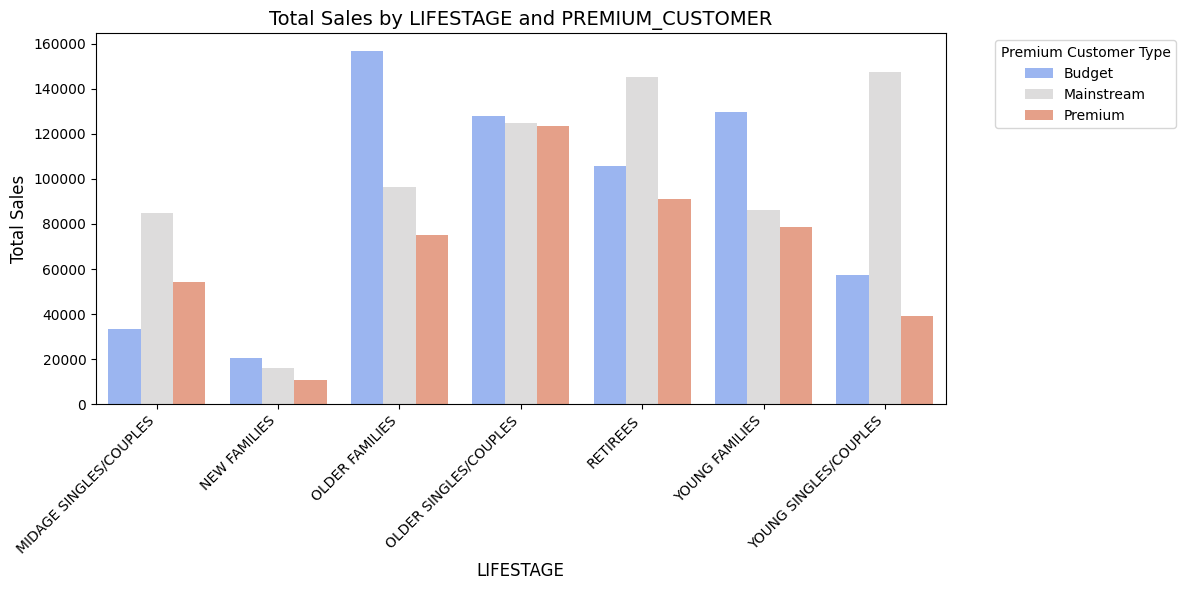

In [34]:
#  Plot the total sales
plt.figure(figsize=(12, 6))

sns.barplot(
    data=total_sales,
    x='LIFESTAGE',
    y='total_sales',
    hue='PREMIUM_CUSTOMER',
    palette='coolwarm'
)

plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=14)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("TotalSales.png")
plt.show()

In [35]:
#  Calculate the number of unique customers by LIFESTAGE and PREMIUM_CUSTOMER
num_customers = (
    data
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(num_customers=('LYLTY_CARD_NBR', 'nunique'))  # Count unique customers
    .reset_index()
)

#  View the calculated number of customers
print(num_customers)

                 LIFESTAGE PREMIUM_CUSTOMER  num_customers
0   MIDAGE SINGLES/COUPLES           Budget           1474
1   MIDAGE SINGLES/COUPLES       Mainstream           3298
2   MIDAGE SINGLES/COUPLES          Premium           2369
3             NEW FAMILIES           Budget           1087
4             NEW FAMILIES       Mainstream            830
5             NEW FAMILIES          Premium            575
6           OLDER FAMILIES           Budget           4611
7           OLDER FAMILIES       Mainstream           2788
8           OLDER FAMILIES          Premium           2231
9    OLDER SINGLES/COUPLES           Budget           4849
10   OLDER SINGLES/COUPLES       Mainstream           4858
11   OLDER SINGLES/COUPLES          Premium           4682
12                RETIREES           Budget           4385
13                RETIREES       Mainstream           6358
14                RETIREES          Premium           3812
15          YOUNG FAMILIES           Budget           39

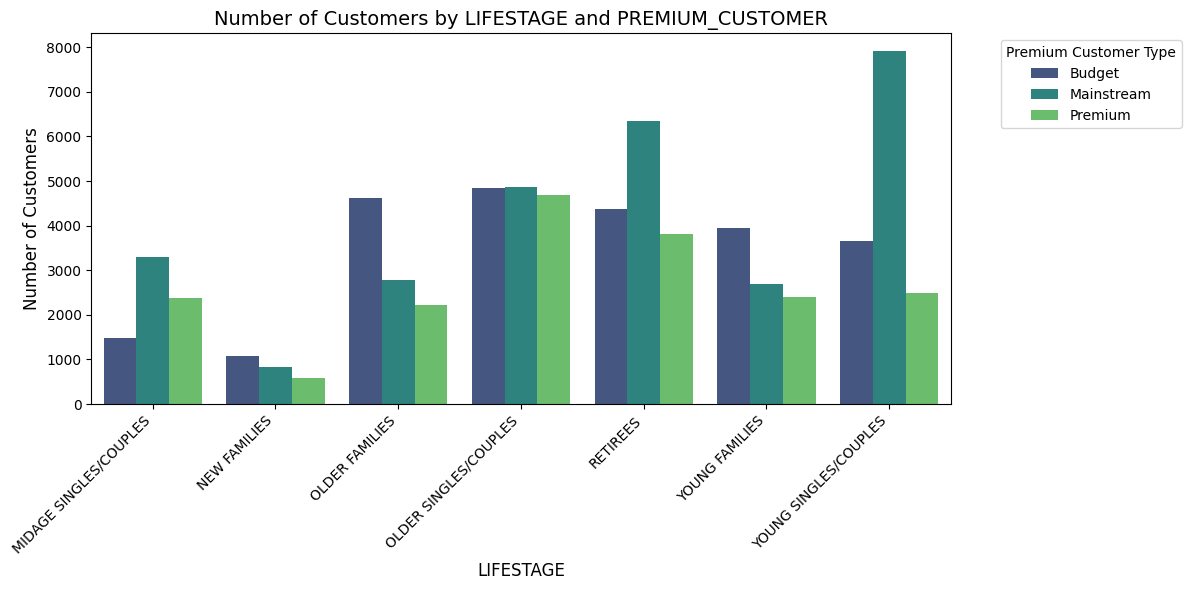

In [36]:
#  Plot the number of customers
plt.figure(figsize=(12, 6))

sns.barplot(
    data=num_customers,
    x='LIFESTAGE',
    y='num_customers',
    hue='PREMIUM_CUSTOMER',
    palette='viridis'
)

plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=14)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("UniqueCustomers.png")
plt.show()

In [37]:
#  Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_per_customer = (
    data
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(
        total_units = ('PROD_QTY','sum'),  # total quantity of chips bought
        unique_customers = ('LYLTY_CARD_NBR','nunique')  # unique customers
    )
    .reset_index()
)

#  Calculate the average units per customers
avg_units_per_customer['avg_units'] = avg_units_per_customer['total_units']/avg_units_per_customer['unique_customers']
print(avg_units_per_customer)

                 LIFESTAGE PREMIUM_CUSTOMER  total_units  unique_customers  \
0   MIDAGE SINGLES/COUPLES           Budget         8883              1474   
1   MIDAGE SINGLES/COUPLES       Mainstream        21213              3298   
2   MIDAGE SINGLES/COUPLES          Premium        14400              2369   
3             NEW FAMILIES           Budget         5241              1087   
4             NEW FAMILIES       Mainstream         4060               830   
5             NEW FAMILIES          Premium         2769               575   
6           OLDER FAMILIES           Budget        41853              4611   
7           OLDER FAMILIES       Mainstream        25804              2788   
8           OLDER FAMILIES          Premium        20239              2231   
9    OLDER SINGLES/COUPLES           Budget        32883              4849   
10   OLDER SINGLES/COUPLES       Mainstream        32607              4858   
11   OLDER SINGLES/COUPLES          Premium        31695        

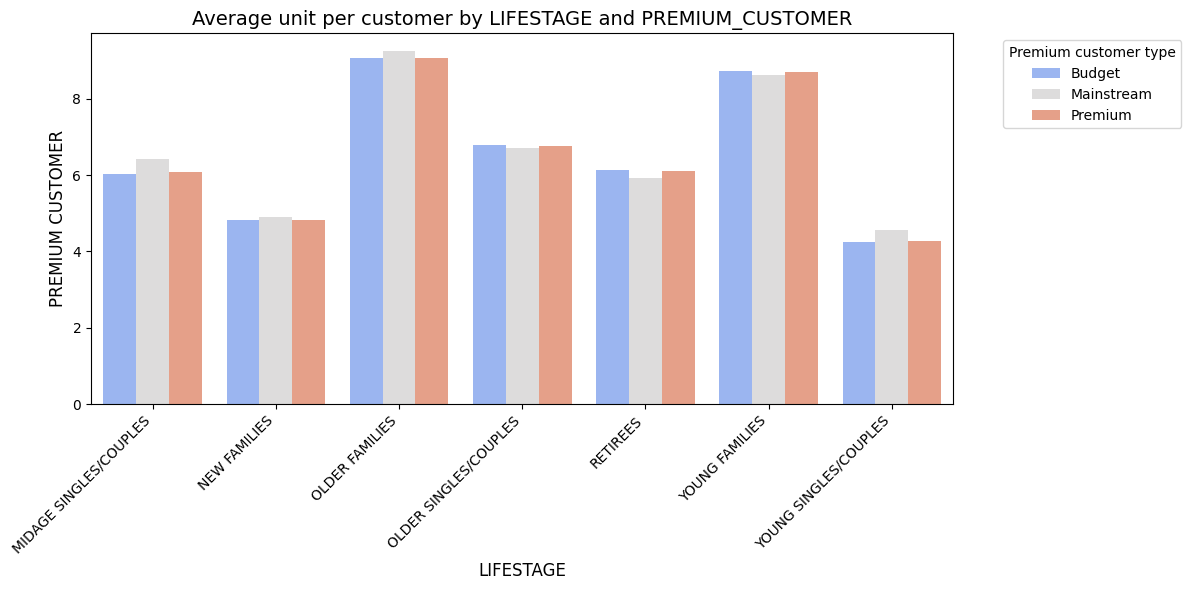

In [38]:
#  Plot the avg units per customer
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_units_per_customer,
    x='LIFESTAGE',
    y='avg_units',
    hue='PREMIUM_CUSTOMER',
    palette='coolwarm',
)

plt.title('Average unit per customer by LIFESTAGE and PREMIUM_CUSTOMER',fontsize=14)
plt.xlabel('LIFESTAGE',fontsize=12)
plt.ylabel('PREMIUM CUSTOMER',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.legend(title='Premium customer type', bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.savefig("AvgUnitPerCust.png")
plt.show()

In [39]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = (
    data
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum())  # Total sales / Total quantity
    .reset_index(name='avg_price')
)

print(avg_price_per_unit)

                 LIFESTAGE PREMIUM_CUSTOMER  avg_price
0   MIDAGE SINGLES/COUPLES           Budget   3.753878
1   MIDAGE SINGLES/COUPLES       Mainstream   3.994449
2   MIDAGE SINGLES/COUPLES          Premium   3.780823
3             NEW FAMILIES           Budget   3.931969
4             NEW FAMILIES       Mainstream   3.935887
5             NEW FAMILIES          Premium   3.886168
6           OLDER FAMILIES           Budget   3.747969
7           OLDER FAMILIES       Mainstream   3.736380
8           OLDER FAMILIES          Premium   3.717703
9    OLDER SINGLES/COUPLES           Budget   3.887529
10   OLDER SINGLES/COUPLES       Mainstream   3.822753
11   OLDER SINGLES/COUPLES          Premium   3.897698
12                RETIREES           Budget   3.932731
13                RETIREES       Mainstream   3.852986
14                RETIREES          Premium   3.924037
15          YOUNG FAMILIES           Budget   3.761903
16          YOUNG FAMILIES       Mainstream   3.722439
17        

C:\Users\Ragha\AppData\Local\Temp\ipykernel_20444\1540886505.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum())  # Total sales / Total quantity


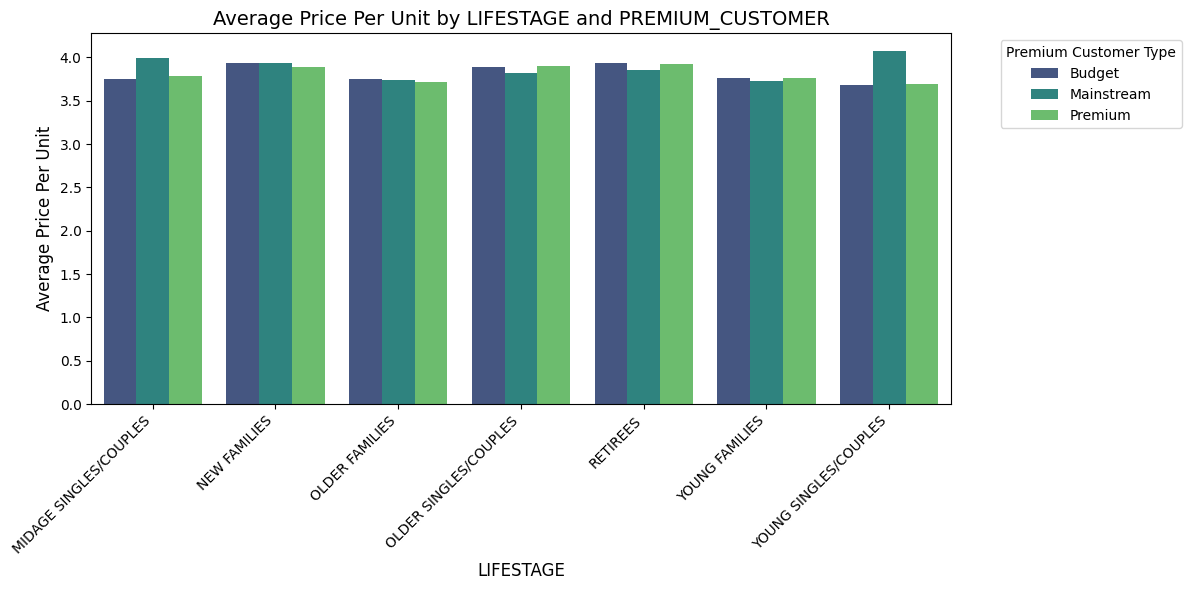

In [40]:
#  Plot the average price per unit
plt.figure(figsize=(12, 6))

sns.barplot(
    data=avg_price_per_unit,
    x='LIFESTAGE',
    y='avg_price',
    hue='PREMIUM_CUSTOMER',
    palette='viridis'
)

plt.title('Average Price Per Unit by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=14)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Average Price Per Unit', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("AvgPricePerUnit.png")
plt.show()

In [41]:
# Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
data['AVG_PRICE_PER_UNITS'] = data['TOT_SALES']/ data['PROD_QTY']
mainstream_young_midage = data[(data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]['AVG_PRICE_PER_UNITS']
budget_premium_young_midage = data[(data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium']))]['AVG_PRICE_PER_UNITS']

t_test_result = stats.ttest_ind(mainstream_young_midage, budget_premium_young_midage)
print(t_test_result)

TtestResult(statistic=np.float64(37.83196107667815), pvalue=np.float64(2.235645611549355e-309), df=np.float64(57365.0))


C:\Users\Ragha\AppData\Local\Temp\ipykernel_20444\1340157512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brandPreference.index, y=brandPreference.values, palette='viridis')


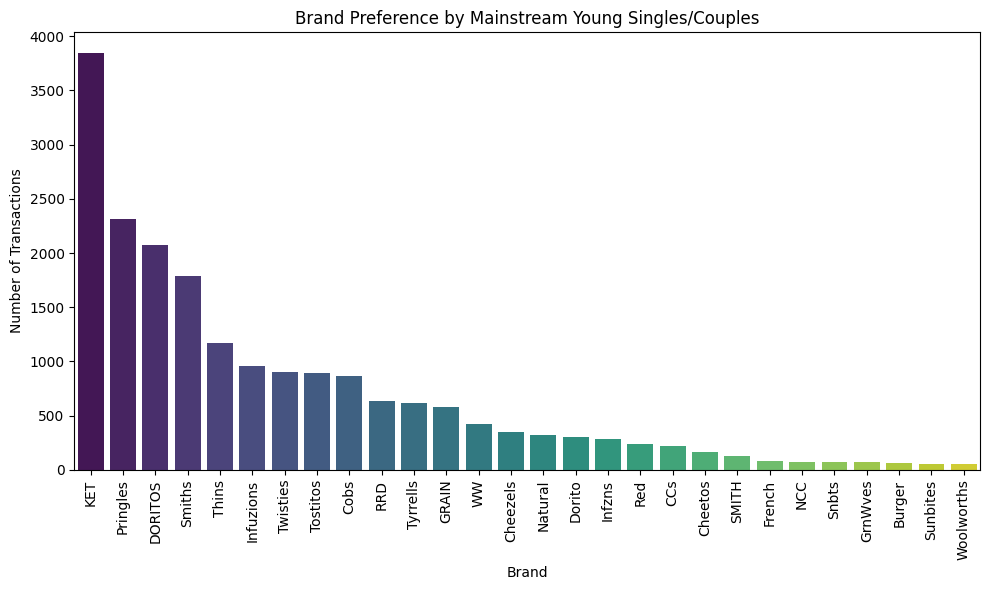

In [42]:
# Deep dive into Mainstream, young singles/couples
young_singles_couples_mainstream = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
brandPreference = young_singles_couples_mainstream['BRAND'].value_counts()

# Plot brand preference
plt.figure(figsize=(10, 6))
sns.barplot(x=brandPreference.index, y=brandPreference.values, palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Number of Transactions')
plt.title('Brand Preference by Mainstream Young Singles/Couples')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("BrandPref.png")
plt.show()

C:\Users\Ragha\AppData\Local\Temp\ipykernel_20444\442580143.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young Singles/Couples Mainstream', 'Overall'], y=[young_singles_couples_mainstream_packSize, overallAvgPackSize], palette='magma')


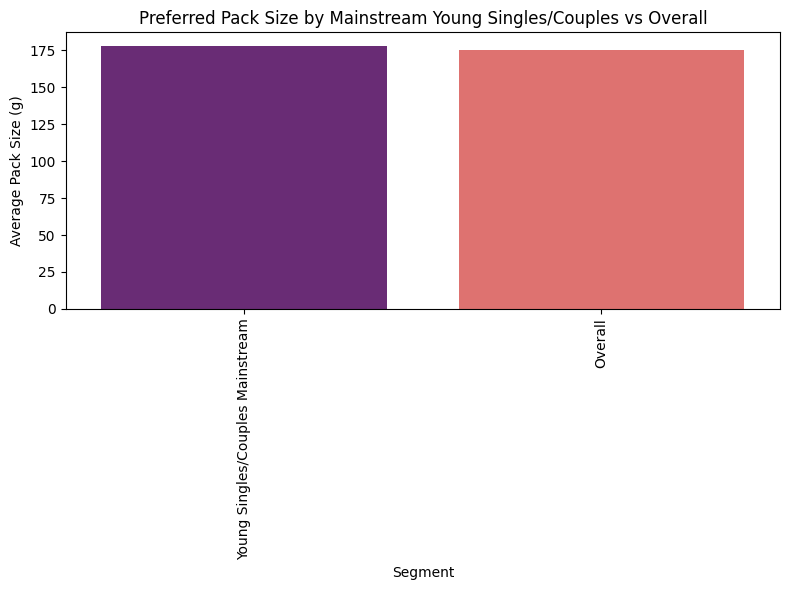

In [43]:
# Preferred pack size compared to the rest of the population
packSizeComparison = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PACK_SIZE'].mean().reset_index()
young_singles_couples_mainstream_packSize = packSizeComparison[(packSizeComparison['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (packSizeComparison['PREMIUM_CUSTOMER'] == 'Mainstream')]['PACK_SIZE'].values[0]
overallAvgPackSize = packSizeComparison[(packSizeComparison['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES') | (packSizeComparison['PREMIUM_CUSTOMER'] != 'Mainstream')]['PACK_SIZE'].mean()

# Plot preferred pack size
plt.figure(figsize=(8, 6))
sns.barplot(x=['Young Singles/Couples Mainstream', 'Overall'], y=[young_singles_couples_mainstream_packSize, overallAvgPackSize], palette='magma')
plt.xlabel('Segment')
plt.ylabel('Average Pack Size (g)')
plt.title('Preferred Pack Size by Mainstream Young Singles/Couples vs Overall')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [44]:
# data.to_csv('Complete_transaction_Data.csv',index=False)